### Correlations

In [1]:
import pandas as pd
import numpy as np

import pandas_datareader as pdr
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib notebook

csv_file = 'AAPL.csv'
aapl = pd.read_csv(csv_file, index_col='Date',parse_dates=True)

### Calculate the return (CAGR), maximal drawdown and volatility of SPY and TLT

In [3]:
tickers = ['SPY', 'TLT']

start = dt.datetime(2008,1,1)
end = dt.datetime(2017,12,31)
data = pdr.get_data_yahoo(tickers, start, end)

In [4]:
data = data['Adj Close']

In [5]:
log_returns = np.log(data/data.shift())

In [6]:
log_returns.corr()

Symbols,SPY,TLT
Symbols,,
SPY,1.00000,-0.44548
TLT,-0.44548,1.00000


<IPython.core.display.Javascript object>


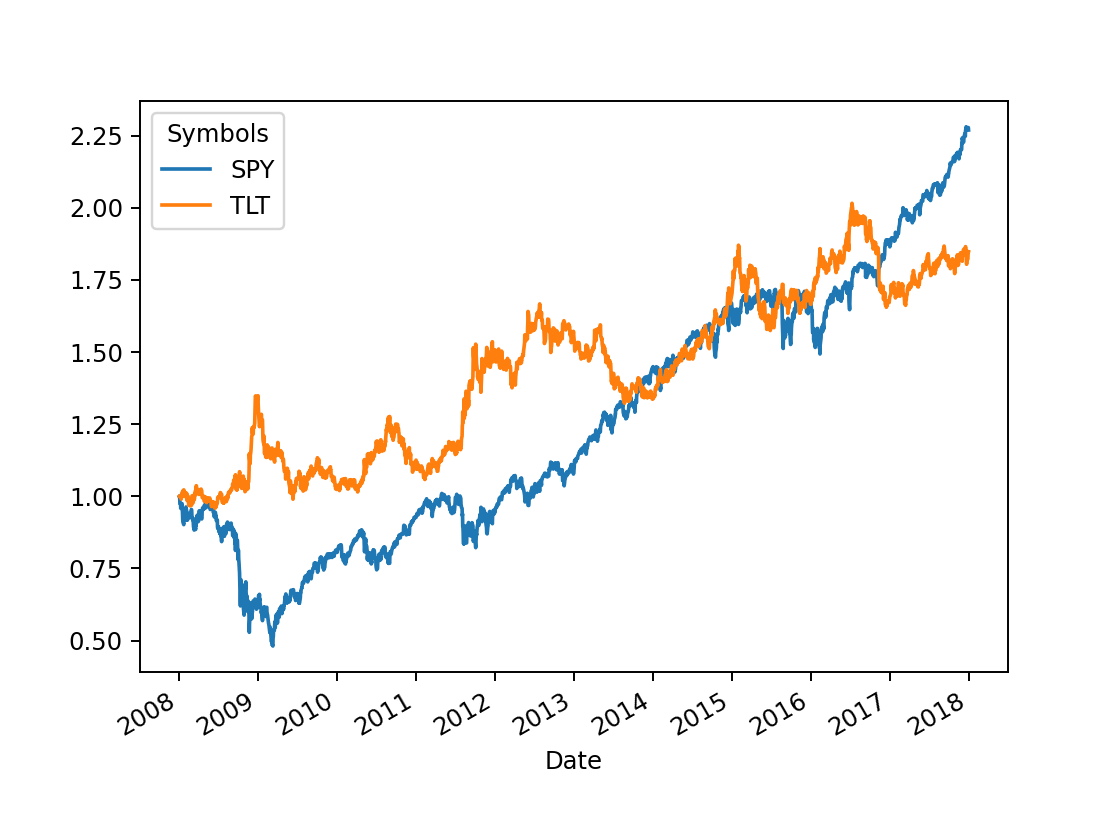

<AxesSubplot:xlabel='Date'>

In [7]:
fig,  ax = plt.subplots()
(data/data.iloc[0]).plot(ax=ax)

<IPython.core.display.Javascript object>


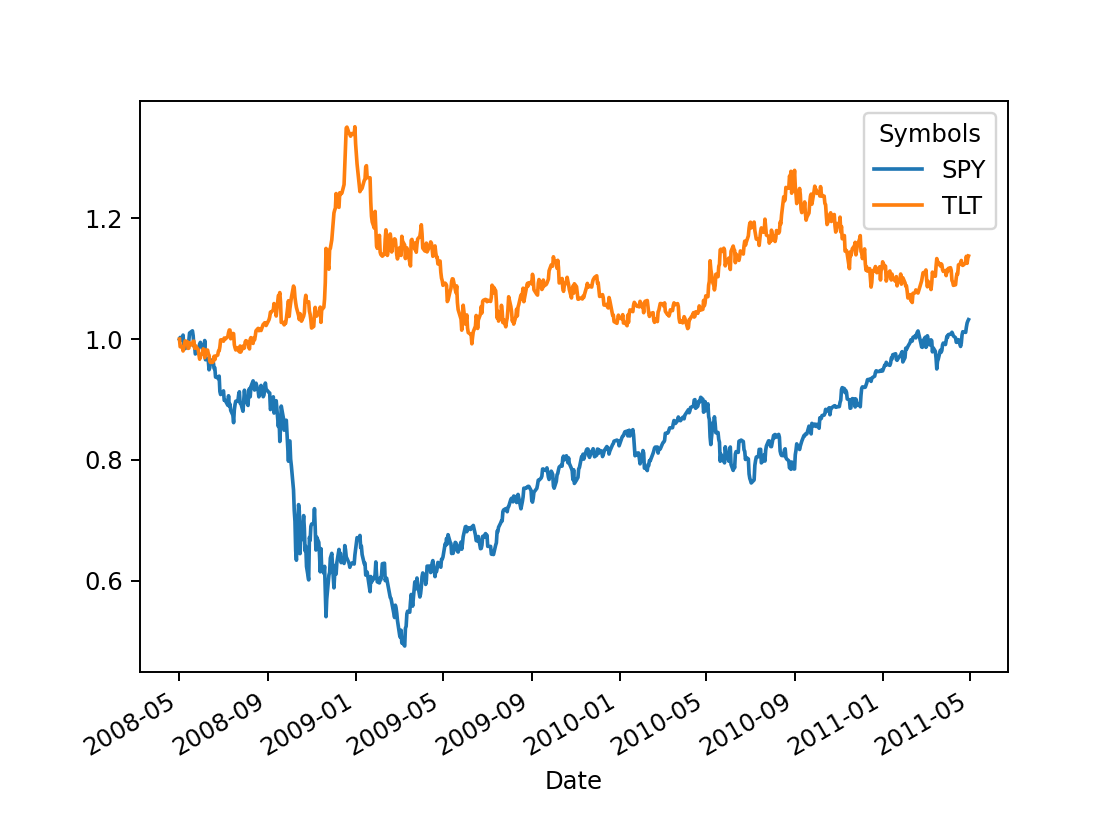

<AxesSubplot:xlabel='Date'>

In [9]:
data_set = data.loc['2008-05':'2011-04']
fig, ax = plt.subplots()
(data_set/data_set.iloc[0]).plot(ax=ax)

### Project – Calculate the return (CAGR), maximal drawdown and volatility of SPY and TLT

In [10]:
cagr_spy = (data['SPY'].iloc[-1]/data['SPY'].iloc[0])** (1/10) -1
cagr_tlt = (data['TLT'].iloc[-1]/data['TLT'].iloc[0])** (1/10) -1

cagr_spy, cagr_tlt

(0.08540696131570025, 0.06332291868959161)

In [11]:
def max_drawdown(data):
    rolling_max = data.cummax()
    daily_drawdown = data / rolling_max -1
    max_drawdown = daily_drawdown.cummin().iloc[-1]
    return max_drawdown

In [12]:
max_drawdown(data['SPY']), max_drawdown(data['TLT'])



(-0.5187374999264392, -0.2658538232039328)

In [13]:
log_returns.std()*(252**0.5)

Symbols
SPY    0.203319
TLT    0.151633
dtype: float64